### Data Preparation


In [134]:
# import library yang dibutuhkan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from multi_imbalance.resampling.mdo import MDO
import itertools
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
pd.set_option("display.max_rows",None)


In [135]:
# penjelasan
# membaca data dari file csv
source = pd.read_csv("../fish.csv") # mengambil data dari file csv

In [136]:
# penjelasan
# menampilkan 5 data teratas
source.head() # mengambil 5 data teratas

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [137]:
# penjelasan detail
# menampilkan informasi data yang ada seperti jumlah data, tipe data, dan memory yang digunakan
source.dtypes #checking the data types of the columns

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [138]:
source.isnull().sum() # melihat jumlah data yang kosong

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [139]:
source.shape # digunakan untuk mengetahui jumlah baris dan kolom

(149, 7)

In [140]:
# melihat total ikan dari setiap spesies
source.Species.value_counts()

Species
Perch        54
Bream        33
Roach        18
Pike         16
Smelt        13
Parkki       10
Whitefish     5
Name: count, dtype: int64

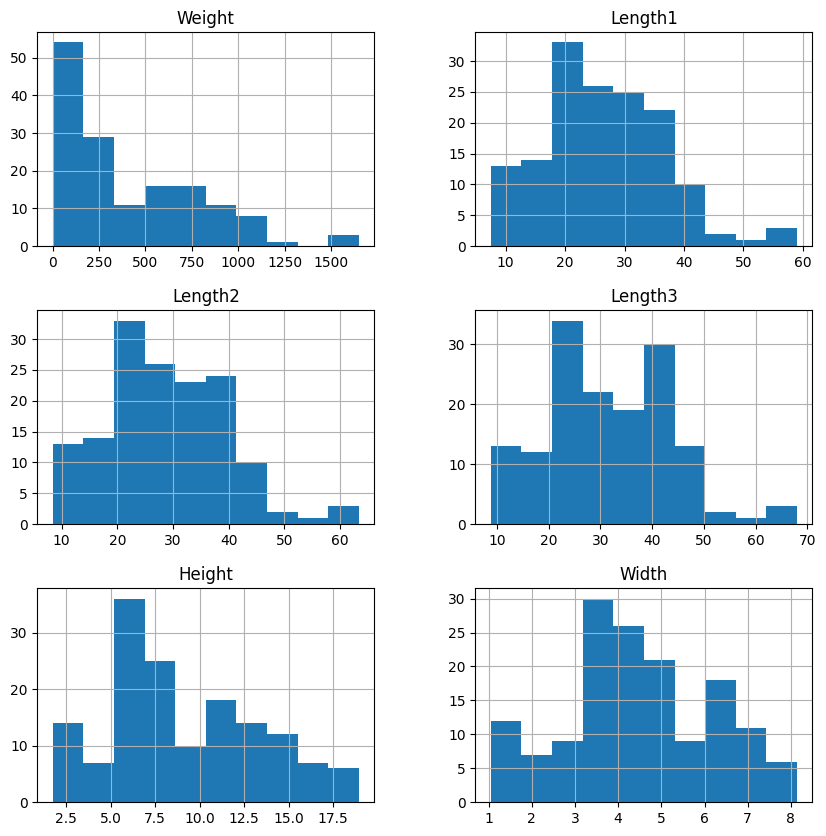

In [141]:
source.hist(figsize=(10,10)) # membuat histogram
plt.show()

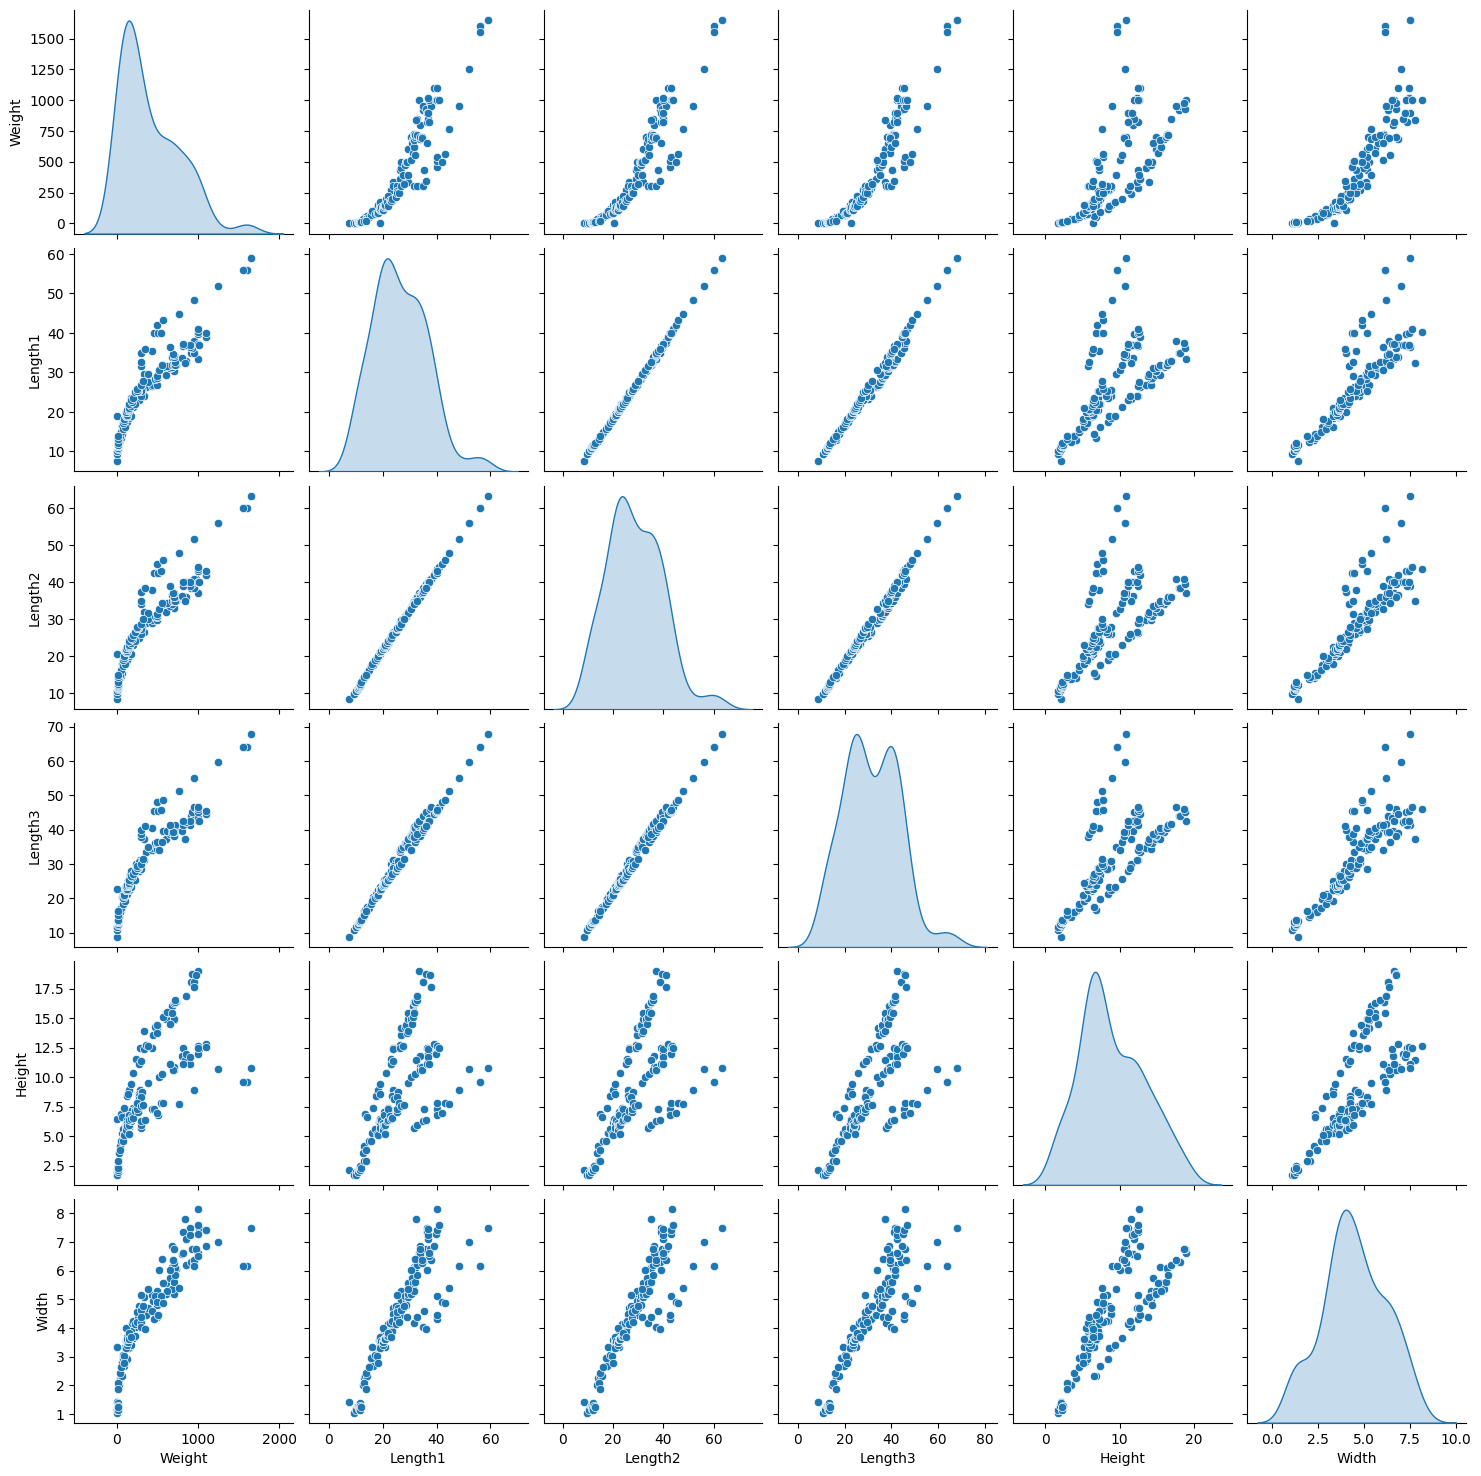

In [142]:
# membuat pairplot untuk melihat hubungan antar variabel yang berbeda dan distribusi data dari setiap spesies
sns.pairplot(source,diag_kind="kde") 
plt.show()

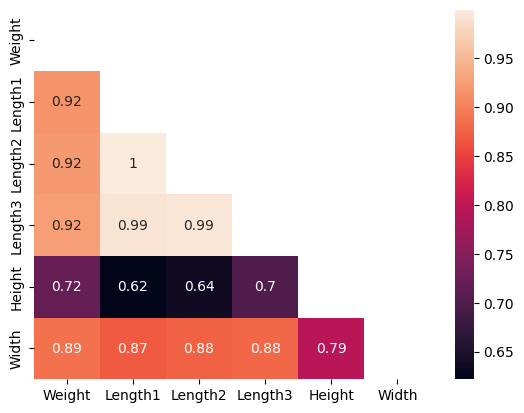

In [143]:

numeric_df = source.select_dtypes(include=[np.number]) # filter data yang hanya berupa numerik


corr_matrix = numeric_df.corr() # menghitung korelasi antar variabel

mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # membuat mask untuk menampilkan setengah matriks

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, mask=mask) # membuat heatmap
plt.show()

In [144]:
X = source.iloc[:,1:].copy() # memisahkan variabel independen dari dataset, copy() digunakan untuk menghindari perubahan pada dataset asli
y = source.iloc[:,0].copy() # memisahkan variabel dependen dari dataset , copy() digunakan untuk menghindari perubahan pada dataset asli

from sklearn.preprocessing import LabelEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
le = LabelEncoder()
ylab = le.fit_transform(y) # mengubah data kategorikal menjadi numerik
labels = pd.DataFrame({"Species":y,"Encoded":ylab}) # membuat dataframe baru untuk menampilkan data kategorikal dan numerik
labels.drop_duplicates(inplace=True) # menghapus data duplikat
labels = labels.sort_values(by="Encoded") # mengurutkan data berdasarkan kolom Encoded
labels


,Species,Encoded
0,Bream,0
56,Parkki,1
66,Perch,2
120,Pike,3
33,Roach,4
136,Smelt,5
51,Whitefish,6


In [145]:
from sklearn.model_selection import train_test_split # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, ylab, test_size=0.2, random_state=1) # membagi data menjadi data latih dan data uji Untuk mengevaluasi model Yang dibuat
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 6), (30, 6), (119,), (30,))

In [146]:
# X train
X_train.head()
X_train.values

array([[5.40000e+02, 4.01000e+01, 4.30000e+01, 4.58000e+01, 7.78600e+00,
        5.12960e+00],
       [2.50000e+02, 2.59000e+01, 2.80000e+01, 2.94000e+01, 7.82040e+00,
        4.20420e+00],
       [1.60000e+02, 2.05000e+01, 2.25000e+01, 2.53000e+01, 7.03340e+00,
        3.82030e+00],
       [6.70000e+00, 9.30000e+00, 9.80000e+00, 1.08000e+01, 1.73880e+00,
        1.04760e+00],
       [9.20000e+02, 3.50000e+01, 3.85000e+01, 4.41000e+01, 1.80369e+01,
        6.30630e+00],
       [1.50000e+02, 2.04000e+01, 2.20000e+01, 2.47000e+01, 5.80450e+00,
        3.75440e+00],
       [6.90000e+02, 3.46000e+01, 3.70000e+01, 3.93000e+01, 1.05717e+01,
        6.36660e+00],
       [1.10000e+03, 4.01000e+01, 4.30000e+01, 4.55000e+01, 1.25125e+01,
        7.41650e+00],
       [6.50000e+02, 3.10000e+01, 3.35000e+01, 3.87000e+01, 1.44738e+01,
        5.72760e+00],
       [1.01500e+03, 3.70000e+01, 4.00000e+01, 4.24000e+01, 1.23808e+01,
        7.46240e+00],
       [9.80000e+00, 1.14000e+01, 1.20000e+01, 1.3

In [147]:
# Y TRAIN
pd.Series(y_train).value_counts() # melihat jumlah data dari setiap spesies pada data latih

2    42
0    27
3    15
4    14
5    11
1     8
6     2
Name: count, dtype: int64

### Dengan Library

In [148]:
from sklearn.tree import DecisionTreeClassifier # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.model_selection import GridSearchCV # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
dtree_model = DecisionTreeClassifier(random_state=11)
dtree_grid = GridSearchCV(estimator=dtree_model,
                       param_grid={"max_leaf_nodes":list(np.arange(2,50,1)),
                                  "criterion":["gini","entropy"]}
                                  ,scoring="f1_weighted",cv=5,n_jobs=-1)
m = dtree_grid.fit(X_train,y_train)
print("Best Model: "+str(m.best_estimator_))
print("Decision Tree CV F1 Score: "+str(m.best_score_))
print("Decision Tree Test F1 Score: "+str(m.score(X_test,y_test)))


c:\Users\pandu\Documents\KULIAH\ITTS\Semester 4\Tugas\Kecerdasan Buatan\Minggu 11 - 06 April 2024 - Tubes\tubes-ai\tubesAI\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Model: DecisionTreeClassifier(max_leaf_nodes=13, random_state=11)
Decision Tree CV F1 Score: 0.7872828116753948
Decision Tree Test F1 Score: 0.5824242424242424


### Tanpa Library

In [149]:
class DecisionTreeClassifierScratch:
  def __init__(self, max_depth=None):
    self.max_depth = max_depth
    self.tree = None

  def fit(self, X, y):
    self.tree = self._build_tree(X, y, depth=0)

  def predict(self, X):
    predictions = []
    for sample in X:
      predictions.append(self._traverse_tree(sample, self.tree))
    return np.array(predictions)

  def _build_tree(self, X, y, depth):
    if depth == self.max_depth or len(np.unique(y)) == 1:
      return self._create_leaf_node(y)

    best_split_feature, best_split_value = self._find_best_split(X, y)
    left_indices = X[:, best_split_feature] <= best_split_value
    right_indices = X[:, best_split_feature] > best_split_value

    left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
    right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

    return {
      'feature_index': best_split_feature,
      'split_value': best_split_value,
      'left': left_subtree,
      'right': right_subtree
    }

  def _find_best_split(self, X, y):
    best_gini = float('inf')
    best_split_feature = None
    best_split_value = None

    for feature_index in range(X.shape[1]):
      unique_values = np.unique(X[:, feature_index])
      for value in unique_values:
        gini = self._calculate_gini_index(X, y, feature_index, value)
        if gini < best_gini:
          best_gini = gini
          best_split_feature = feature_index
          best_split_value = value

    return best_split_feature, best_split_value

  def _calculate_gini_index(self, X, y, feature_index, split_value):
    left_indices = X[:, feature_index] <= split_value
    right_indices = X[:, feature_index] > split_value

    left_labels = y[left_indices]
    right_labels = y[right_indices]

    left_gini = self._calculate_gini_impurity(left_labels)
    right_gini = self._calculate_gini_impurity(right_labels)

    left_weight = len(left_labels) / len(y)
    right_weight = len(right_labels) / len(y)

    return (left_weight * left_gini) + (right_weight * right_gini)

  def _calculate_gini_impurity(self, labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    gini_impurity = 1 - np.sum(probabilities ** 2)
    return gini_impurity

  def _create_leaf_node(self, y):
    unique_labels, counts = np.unique(y, return_counts=True)
    majority_label = unique_labels[np.argmax(counts)]
    return {'label': majority_label}

  def _traverse_tree(self, sample, node):
    if 'label' in node:
      return node['label']

    if sample[node['feature_index']] <= node['split_value']:
      return self._traverse_tree(sample, node['left'])
    else:
      return self._traverse_tree(sample, node['right'])
    
class GridSearchCVScratch:
  def __init__(self, estimator, param_grid, scoring, cv=5, n_jobs=1):
    self.estimator = estimator
    self.param_grid = param_grid
    self.scoring = scoring
    self.cv = cv
    self.n_jobs = n_jobs

  def fit(self, X, y):
    self.best_estimator_ = None
    self.best_score_ = float('-inf')
    self.best_params_ = None

    for params in self._generate_params():
      estimator = self.estimator(**params)
      cv_scores = self._cross_validate(estimator, X, y)
      mean_cv_score = np.mean(cv_scores)

      if mean_cv_score > self.best_score_:
        self.best_score_ = mean_cv_score
        self.best_params_ = params
        self.best_estimator_ = estimator

  def _cross_validate(self, estimator, X, y):
    cv_scores = []
    for _ in range(self.cv):
      X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/self.cv)
      estimator.fit(X_train, y_train)
      y_pred = estimator.predict(X_val)
      score = f1_score(y_val, y_pred, average='weighted')
      cv_scores.append(score)
    return cv_scores

  def _generate_params(self):
    keys = self.param_grid.keys()
    values = self.param_grid.values()
    for combination in itertools.product(*values):
      yield dict(zip(keys, combination))


dtree_model_scratch = DecisionTreeClassifierScratch(max_depth=5)
dtree_model_scratch.fit(X_train.values, y_train)
y_pred = dtree_model_scratch.predict(X_test.values)
print("Decision Tree Scratch F1 Score: "+str(f1_score(y_test, y_pred, average='weighted')))


Decision Tree Scratch F1 Score: 0.542943722943723


In [150]:
# Membuat instance classifier dan melatih model
final_model = DecisionTreeClassifierScratch(max_depth=5)
final_model.fit(X.values, ylab)

In [151]:
# Lakukan prediksi data termasuk spesies mana dari inputan "Weight", "Length1", "Length2", "Length3", "Height", "Width"
def predict_species(weight, length1, length2, length3, height, width):
  data = np.array([weight, length1, length2, length3, height, width]).reshape(1,-1)
  prediction = final_model.predict(data)
  return le.inverse_transform(prediction)[0]

predict_species(242, 25.4, 30.0, 36.6, 14.7, 5.0) # spesies apa dari inputan tersebut
# predict_species(32, 12.5, 13.8, 15.0, 2.6, 1.2) # spesies apa dari inputan tersebut
# predict_species(160, 20.0, 22.0, 23.5, 5.0, 2.0) # spesies apa dari inputan tersebut


'Bream'

In [152]:
# Prediksi menggunakan data uji
test_data = pd.read_csv("../TestData.csv")

test_data_list = test_data.values.tolist()
hasil_test = []

for atribut in test_data_list:
    atribut.append(predict_species(atribut[1], atribut[2], atribut[3], atribut[3], atribut[4], atribut[6]))

# Konversi kembali ke DataFrame
test_data_predicted = pd.DataFrame(test_data_list, columns=test_data.columns.tolist() + ["Predicted_Species"])

# Menampilkan DataFrame hasil prediksi
display(test_data_predicted)

,Species,Weight,Length1,Length2,Length3,Height,Width,Predicted_Species
0,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438,Bream
1,Bream,610.0,30.9,33.5,38.6,15.6330,5.1338,Bream
2,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746,Bream
3,Roach,169.0,22.0,24.0,27.2,7.5344,3.8352,Bream
4,Whitefish,540.0,28.5,31.0,34.0,10.7440,6.5620,Bream
5,Parkki,145.0,19.8,21.5,24.1,9.7364,3.1571,Bream
6,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234,Bream
7,Perch,130.0,20.0,22.0,23.5,6.1100,3.5250,Bream
8,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756,Bream
9,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800,Perch


In [162]:
from sklearn.metrics import confusion_matrix

# Hasil prediksi dan spesies sebenarnya
sprecies_true = np.array([sublist[0] for sublist in test_data_list])
sprecies_pred = np.array([sublist[7] for sublist in test_data_list])

# Menghitung confusion matrix
cm = confusion_matrix(sprecies_true, sprecies_pred)

# Menghitung akurasi
correct_predictions = np.sum(np.diag(cm))
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions

print("Confusion Matrix:")
print(cm)
print("Akurasi:", accuracy)


Confusion Matrix:
[[2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]]
Akurasi: 0.2
